# Introduction to Neural Networks: Bank Churn prediction

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary:

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer
 
* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location 
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer 
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary 

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values 
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [1]:
!pip install imblearn
!pip install xgboost
!pip install pandas-profiling

In [2]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)


# To impute missing values and handle modeling
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# To build a logistic regression model
# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import ClusterCentroids

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.svm import SVC

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")


In [3]:
!pip install tensorflow

In [4]:
# To help with model building
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam

In [5]:
# To get different metric scores
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc


In [6]:
# check scikit-learn version control
import sklearn

print(sklearn.__version__)

1.3.2


## Loading the dataset

In [7]:
data=pd.read_csv('Churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [8]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.790,1,1,0,38190.780,0


1) Data is fairly clean
2) Target Variable is Excited and CustomerID is the Primary Key
3) Further analysis require

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


1) Shape - 10000*14
2) No missing values observed
3) Datatypes seem fine
4) Need to see unique values to identify hidden missing values

#### Checking for Duplicate records

In [10]:
data.duplicated().sum()

0

##### No duplicate records found

### Checking for Duplicates in CustomerID

In [11]:
dupe = data["CustomerId"].duplicated()
dupe[dupe == True].count()

0

##### No Duplicates found

### checking unique values counts in the Object variables

In [12]:
for feature in data.columns:  # Loop through all columns in the dataframe
    if (
        data[feature].dtype == "object"
    ):  # Only apply for columns with categorical strings
        print(data[feature].value_counts())
        print("-" * 30)

Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64
------------------------------
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
------------------------------
Gender
Male      5457
Female    4543
Name: count, dtype: int64
------------------------------


1) No hidden missing/invalid values found
2) Surname has too many values and does not look like a relevant variable for the model building. Will be dropped from training dataset during the split

## Data Overview

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


#### Overview

- CustomerId
   - Primary key with no missing values.
  
- CreditScore:
  - Ranges from 350 to 718.
  - Mean around 651, indicating a potentially normal distribution.
  - Close alignment of mean and median.
- Age:
   - Ranges from 18 to 92.
   - Mean around 39, suggesting a normal distribution.
   - Close alignment of mean and median.

- Tenure:
   - Ranges from 0 to 10.
   - Mean around 5, with equal mean and median, suggesting a normal distribution.
- Balance:
    - Ranges from 0 to 251k.
    - Mean around 76.5k.
    - High standard deviation, indicating a skewed distribution.
- NumOfProducts:
    - Ranges from 1 to 4.
    - Mean around 2, with a slightly skewed distribution.
    - Further examination of distribution recommended.
- HasCrCard:
    - Binary variable with values 0 or 1.
    - More than 50% of customers have a value of 1.
- IsActiveMember:
    - Binary variable with values 0 or 1.
    - Approximately 50% of customers have a value of 1.
- EstimatedSalary:
   - Ranges from 12 to 200k.
   - Mean around 100k, suggesting a normal distribution.
   - Close alignment of mean and median.
- Exited:
   - Binary variable with values 0 or 1.
   - Appears that the majority of customers have exited.

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

#### Univariate Analysis

In [14]:
# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)


In [15]:
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, color="orange"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2, color="tab:cyan"
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

#### Age

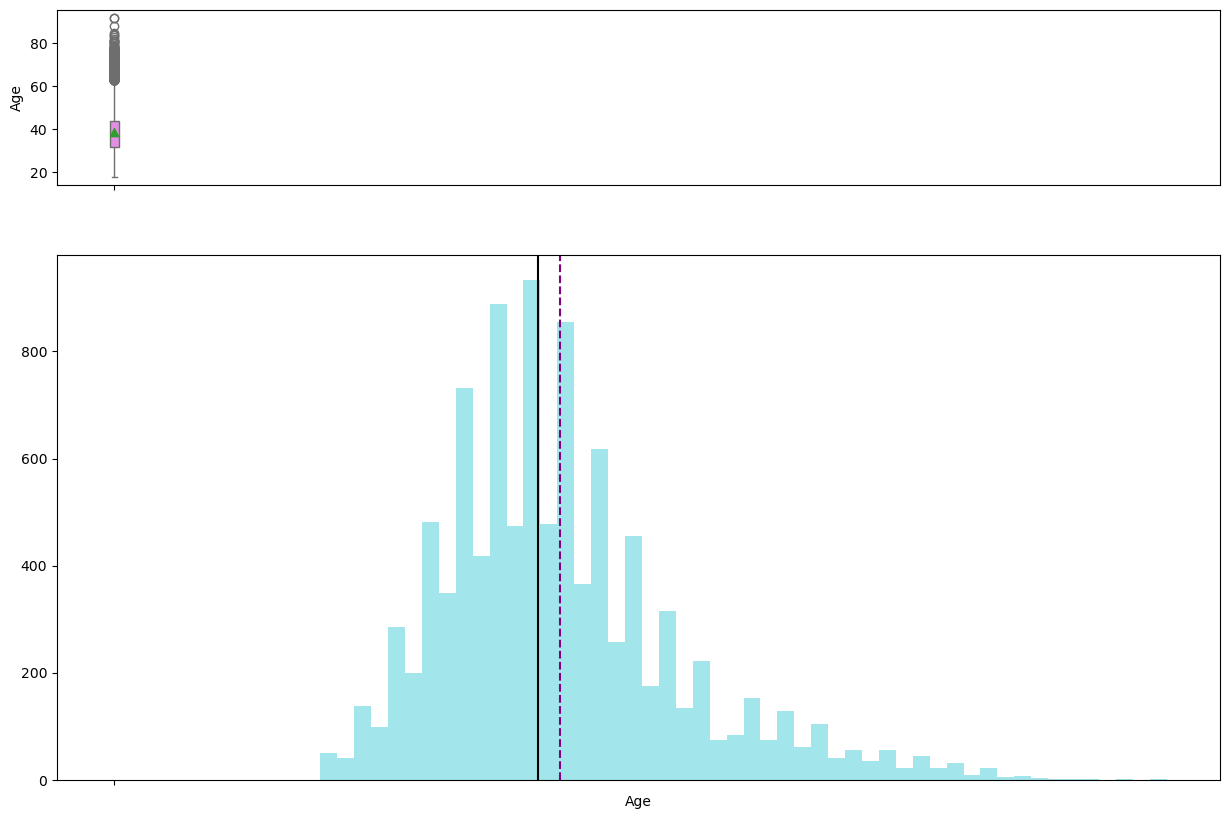

In [16]:
histogram_boxplot(data.Age)

- Age is right skewed

#### Credit score

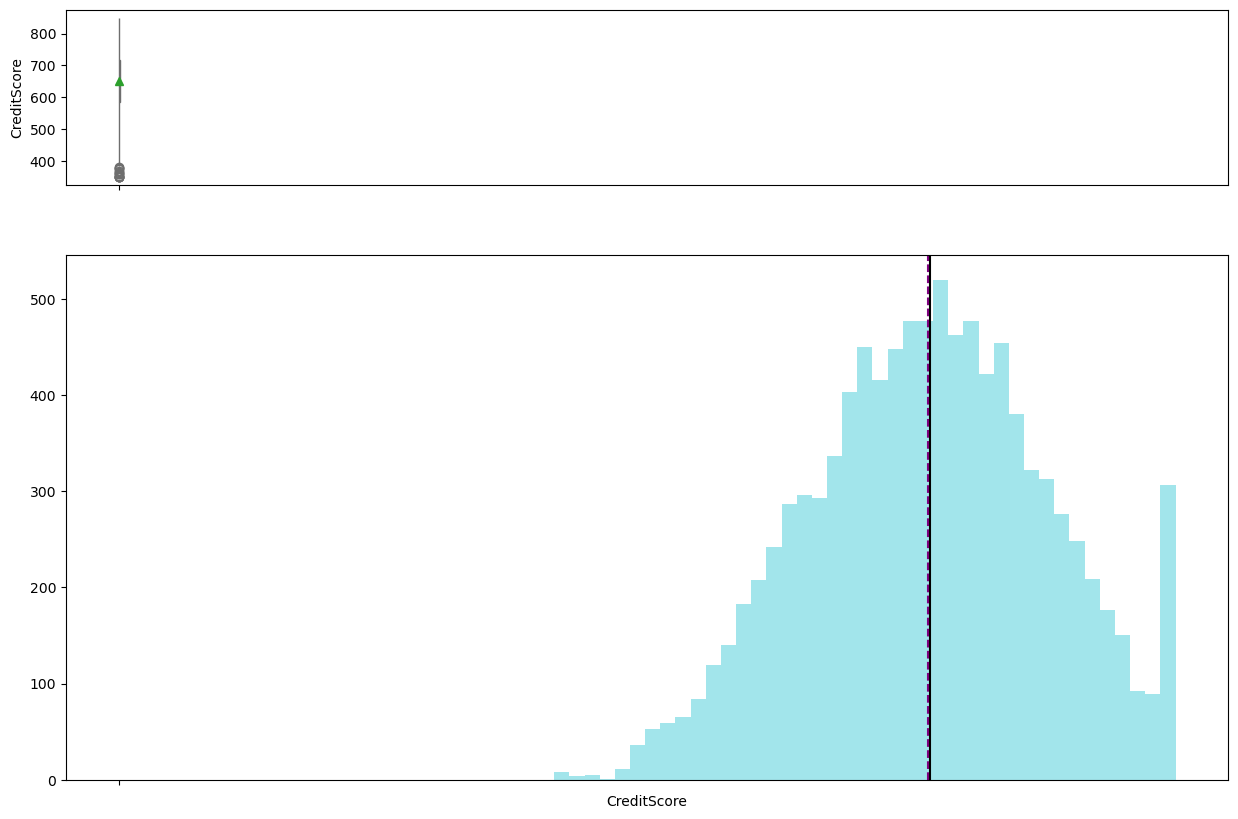

In [17]:
histogram_boxplot(data.CreditScore)

- Normal distribution, with few outliers towards the left. Small peaks at the right end

#### Balance

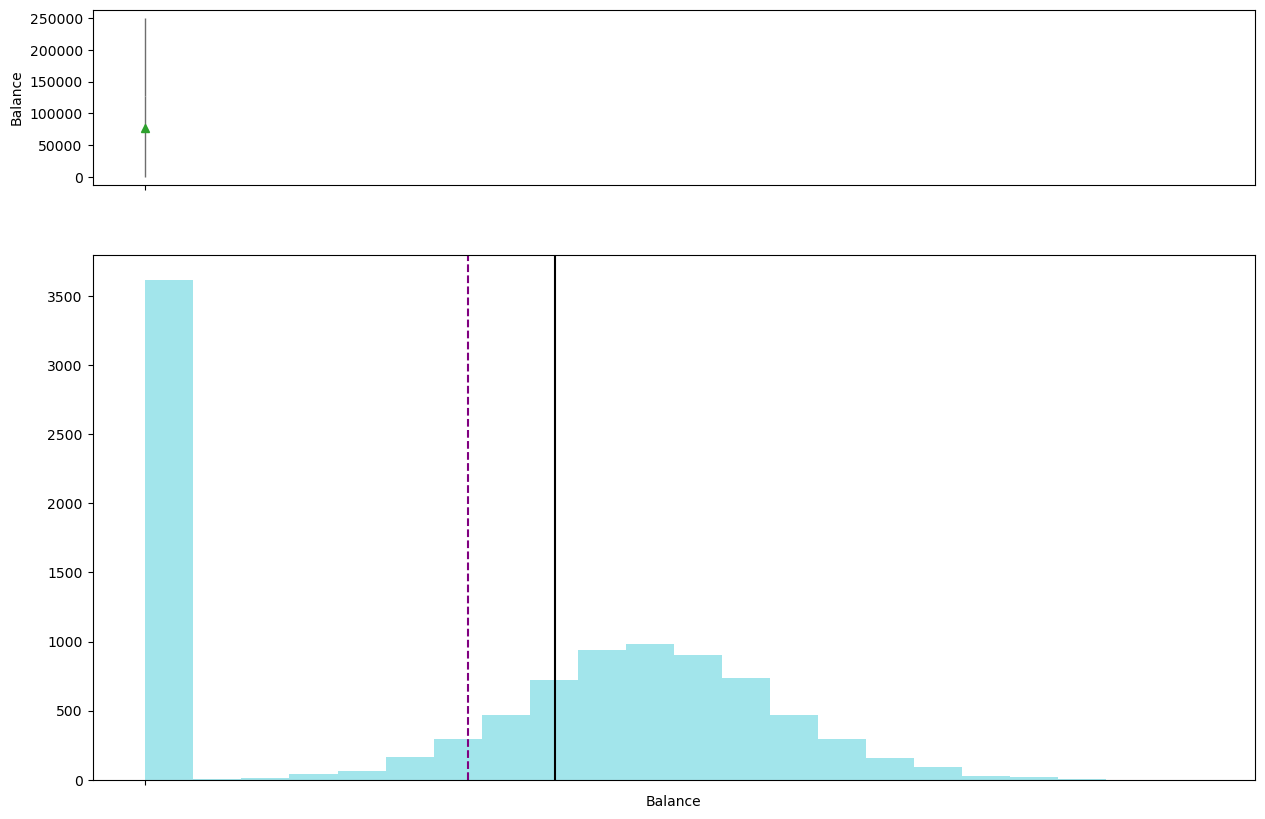

In [18]:
histogram_boxplot(data.Balance)

- Normal distribution, except a peak in the left, causing the skewness

#### EstimatedSalary

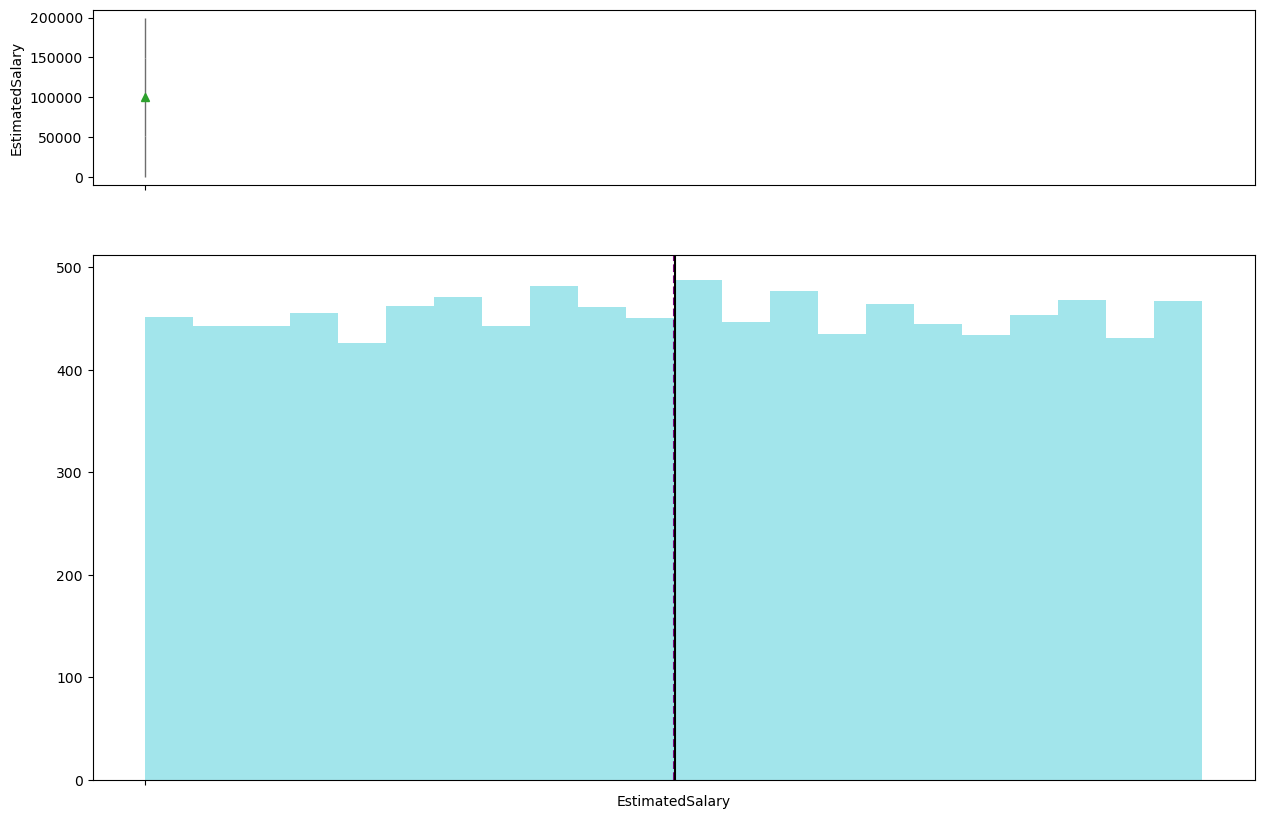

In [19]:
histogram_boxplot(data.EstimatedSalary)

- Similar frequency of all salary buckets.

#### Bivariate analysis

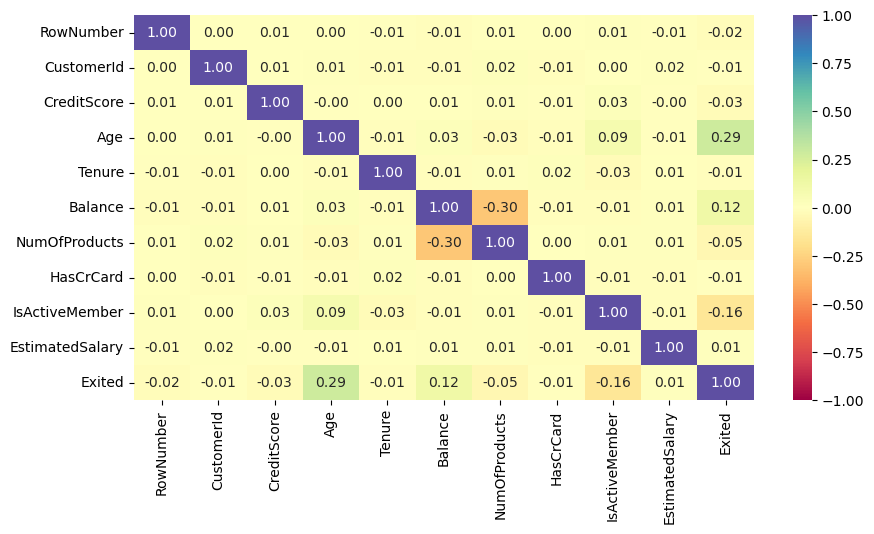

In [20]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(10, 5))
sns.heatmap(data[numeric_columns].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- Variables are independent. No correlation seen, even for the target variable

In [21]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab
    tab1 = pd.crosstab(x, data["Exited"], margins=True).sort_values(
        by=0, ascending=False
    )
    print(tab1)
    print("-" * 120)
    ## visualising the cross tab
    tab = pd.crosstab(x, data["Exited"], normalize="index").sort_values(
        by=0, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(17, 7))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Exited     0     1    All
Tenure                   
All     7963  2037  10000
7        851   177   1028
2        847   201   1048
8        828   197   1025
1        803   232   1035
5        803   209   1012
3        796   213   1009
4        786   203    989
6        771   196    967
9        771   213    984
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


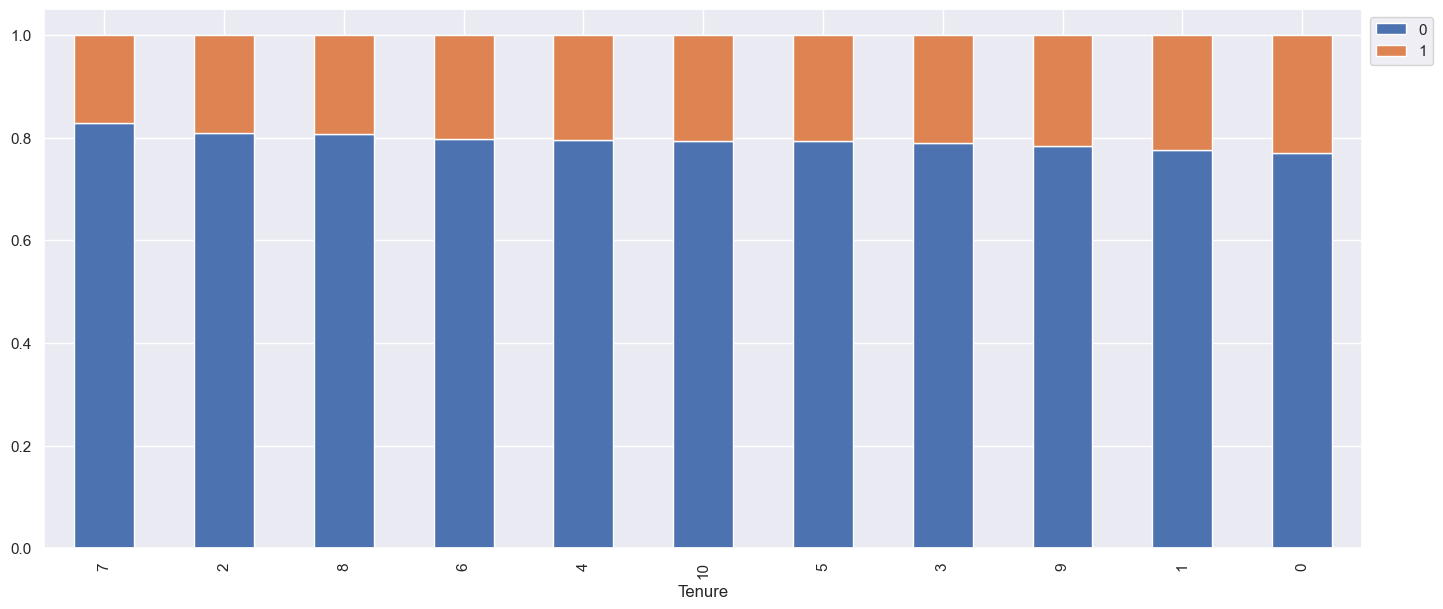

In [22]:
stacked_plot(data["Tenure"])

- Similar distribution of target across all the tenures

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
2              4242   348   4590
1              3675  1409   5084
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


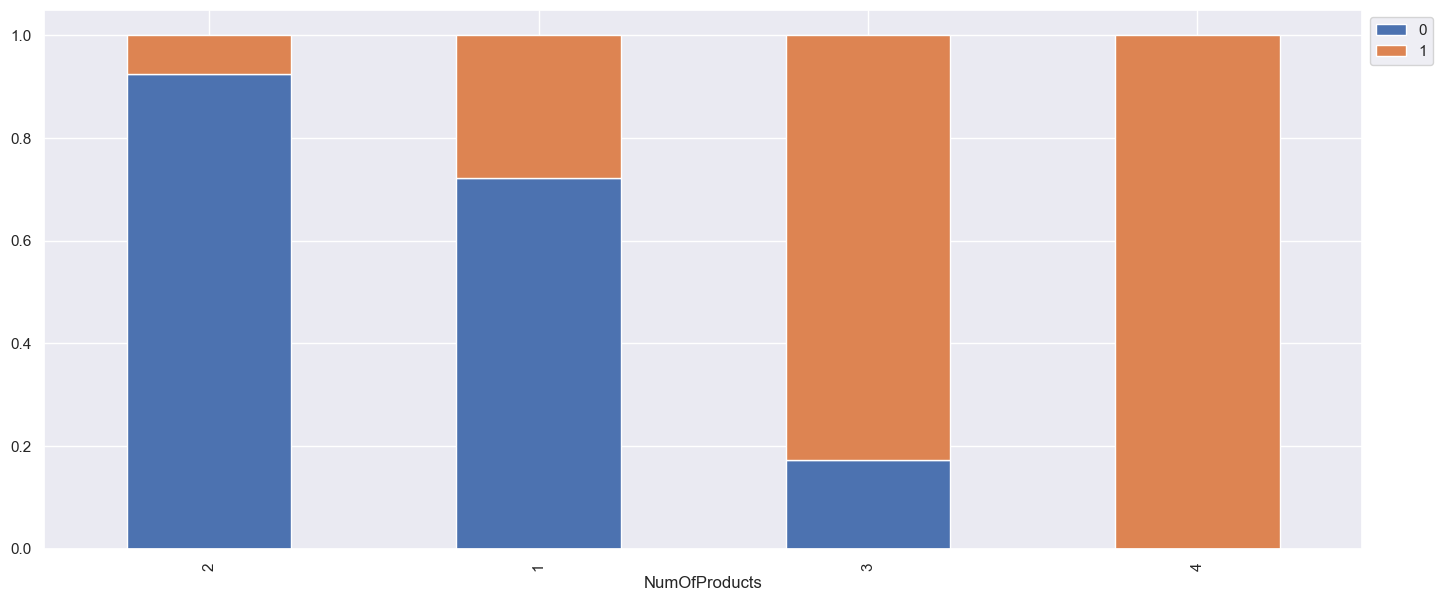

In [23]:
stacked_plot(data["NumOfProducts"])

- Since over 96% customers have either 1 or 2 products, above trend shows single product holding customers churn more

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


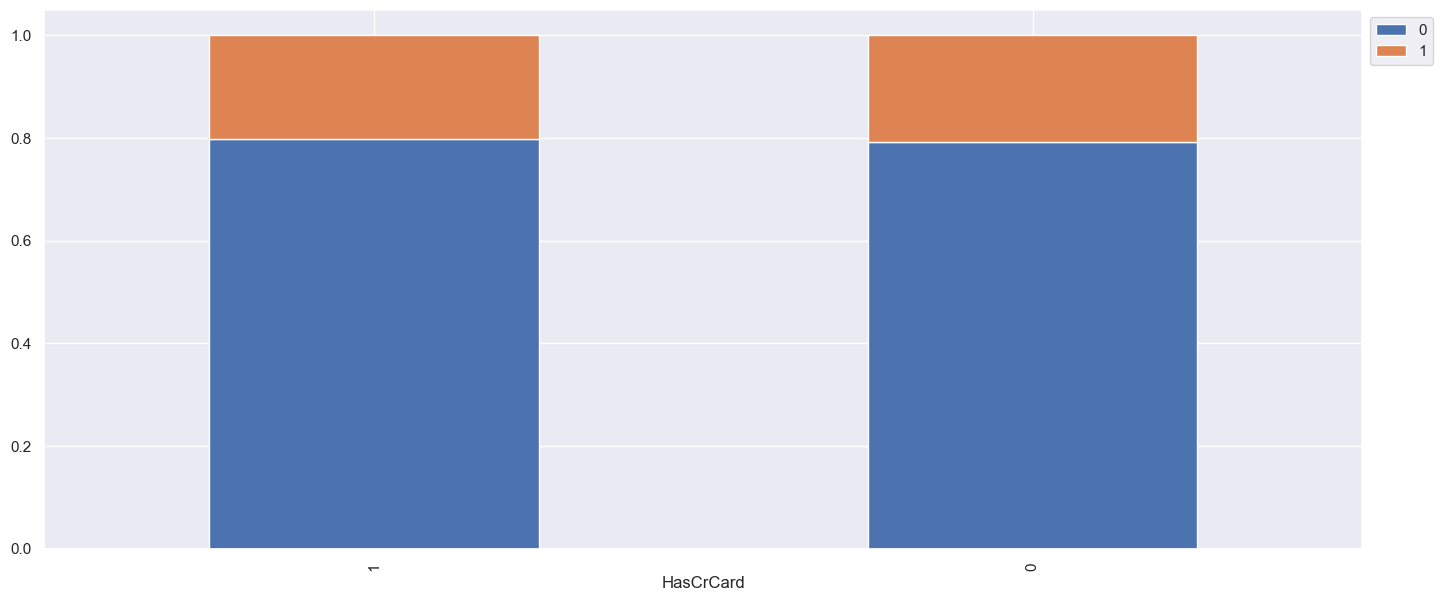

In [24]:
stacked_plot(data["HasCrCard"])

- Similar distribution of the target variable across the HasCrCard variable

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
1               4416   735   5151
0               3547  1302   4849
------------------------------------------------------------------------------------------------------------------------


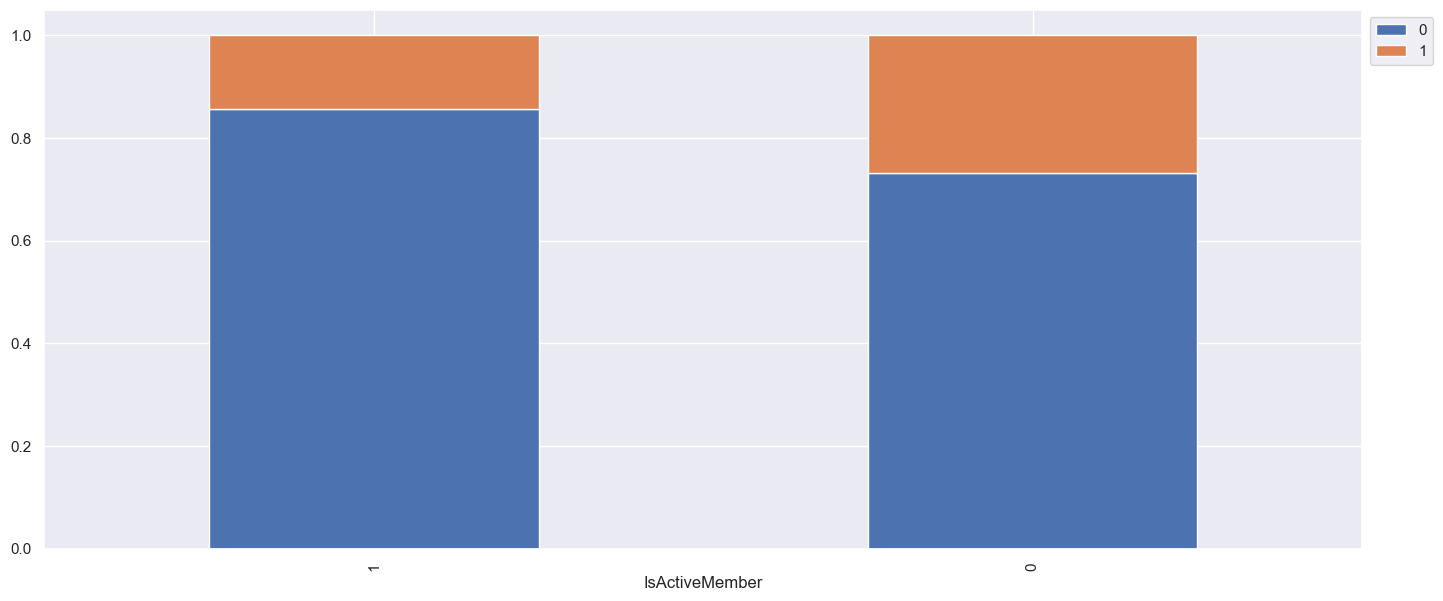

In [25]:
stacked_plot(data["IsActiveMember"])

- Active customers churn less than dormant customers

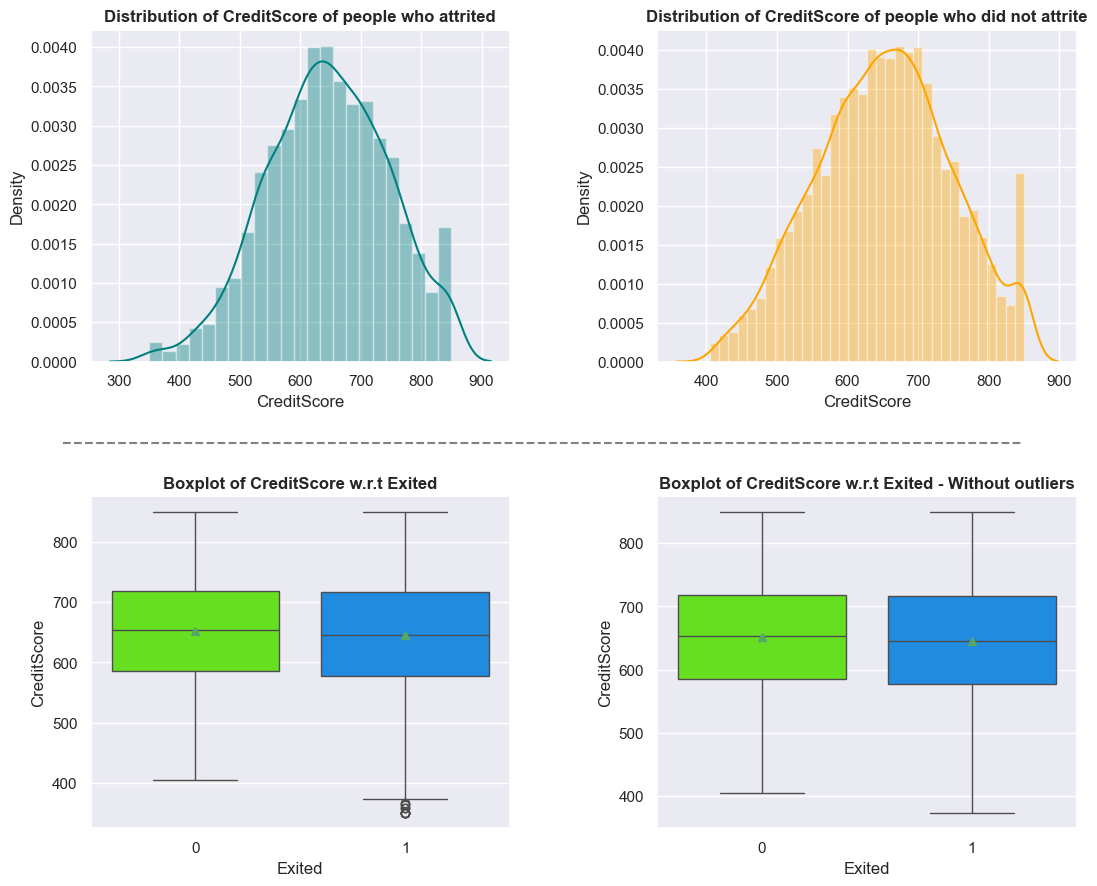

In [26]:
def plot(x, target="Exited"):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs[0, 0].set_title(f"Distribution of {x} of people who attrited", fontsize=12, fontweight="bold")
    sns.distplot(data[data[target] == 1][x], ax=axs[0, 0], color="teal")
    axs[0, 1].set_title(f"Distribution of {x} of people who did not attrite", fontsize=12, fontweight="bold")
    sns.distplot(data[data[target] == 0][x], ax=axs[0, 1], color="orange")
    axs[1, 0].set_title(f"Boxplot of {x} w.r.t Exited", fontsize=12, fontweight="bold")

    line = plt.Line2D((0.1, 0.9), (0.5, 0.5), color="grey", linewidth=1.5, linestyle="--")
    fig.add_artist(line)

    sns.boxplot(x=data[target], y=data[x], ax=axs[1, 0], palette="gist_rainbow", showmeans=True)
    axs[1, 1].set_title(f"Boxplot of {x} w.r.t Exited - Without outliers", fontsize=12, fontweight="bold")
    sns.boxplot(x=data[target], y=data[x], ax=axs[1, 1], showfliers=False, palette="gist_rainbow", showmeans=True)
    plt.tight_layout(pad=4)
    plt.show()


plot("CreditScore")

- On an average similar Credit Score for both attrited and existing customers

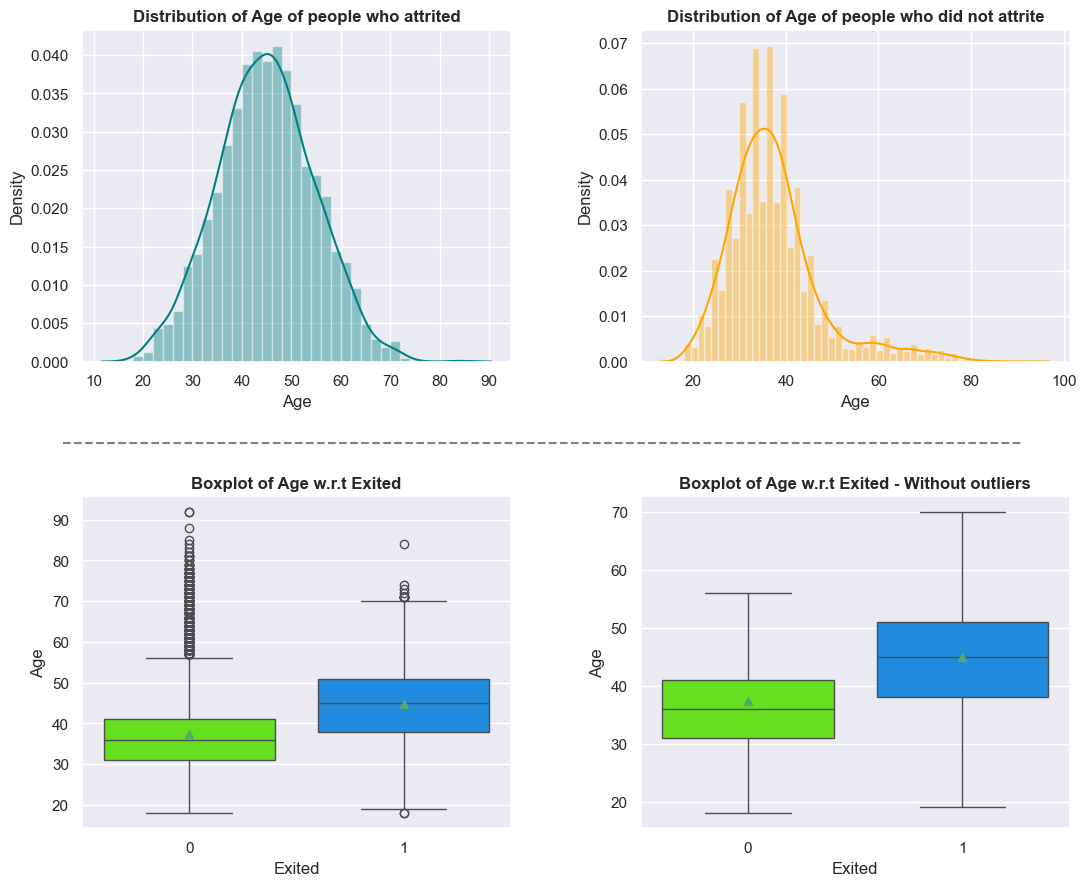

In [27]:
plot("Age")

- Attrited customers are older than the existing customers

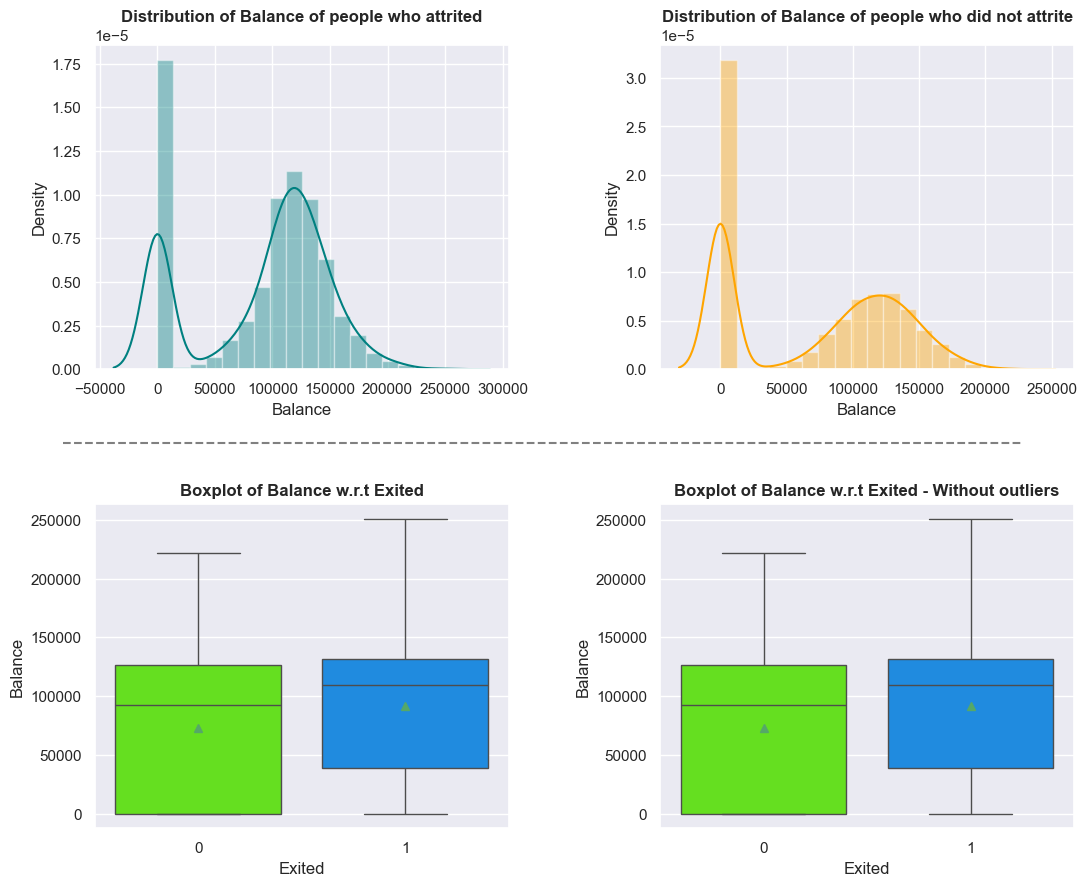

In [28]:
plot("Balance")

- Higher Balance customers are exiting more than the lower balance customers. Probably takeovers by other banks.

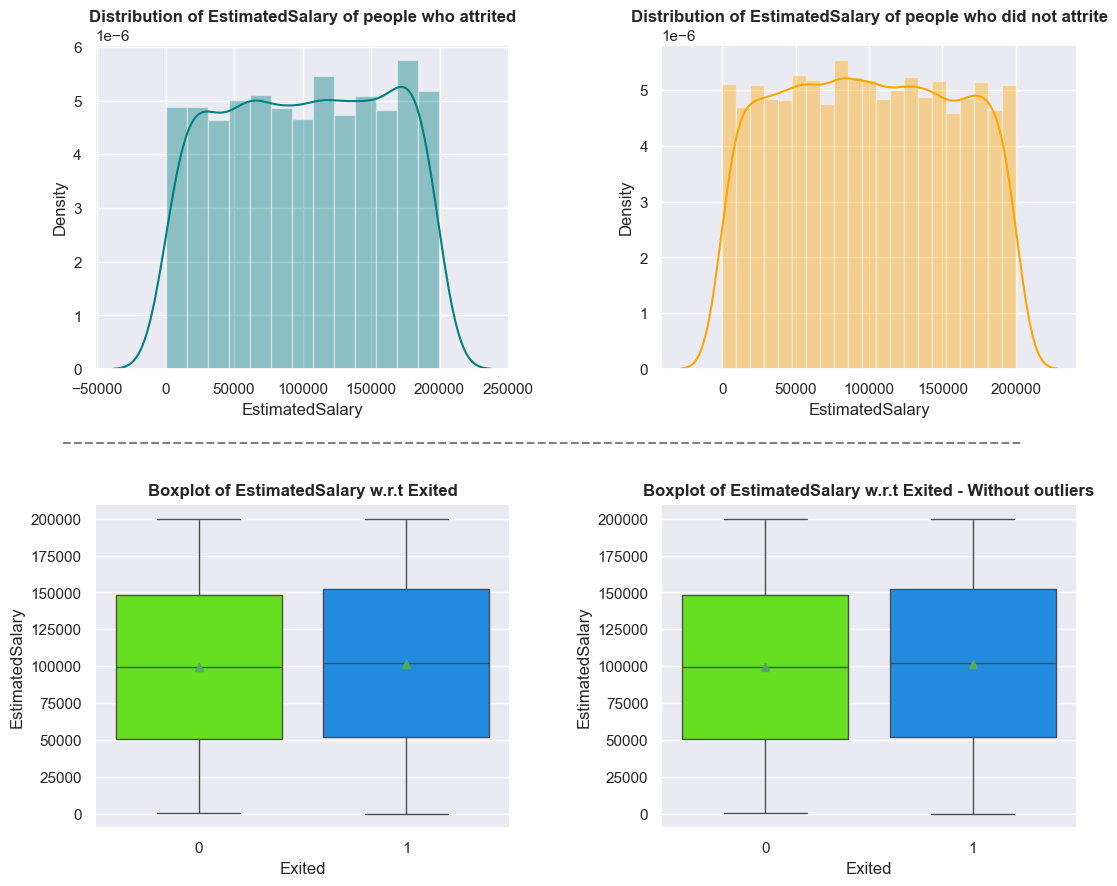

In [29]:
plot("EstimatedSalary")

- Similar trend of the target variable across various salary buckets

### Transforming Skewed Variables

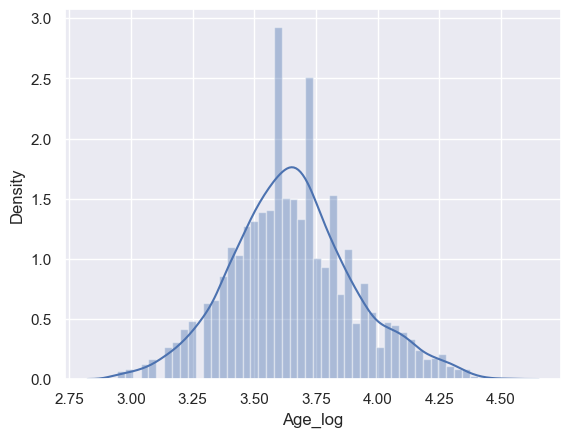

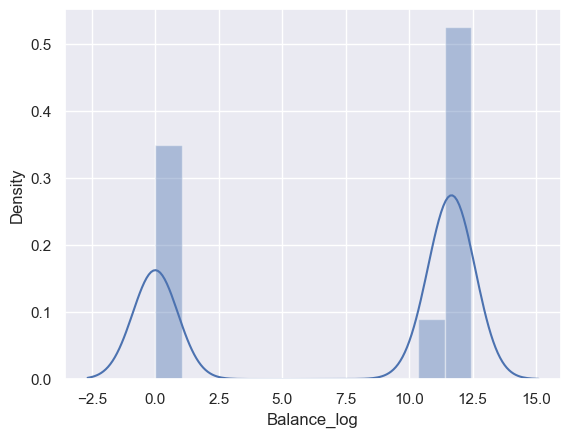

In [30]:
dist_cols = [
    "Age",
    "Balance",
]

for col in dist_cols:
    data[col + "_log"] = np.log(data[col] + 1)
    sns.distplot(data[col + "_log"])
    plt.show()

#### Here our main interest is to get an understanding as to how the given attributes relate to the 'Exit' status

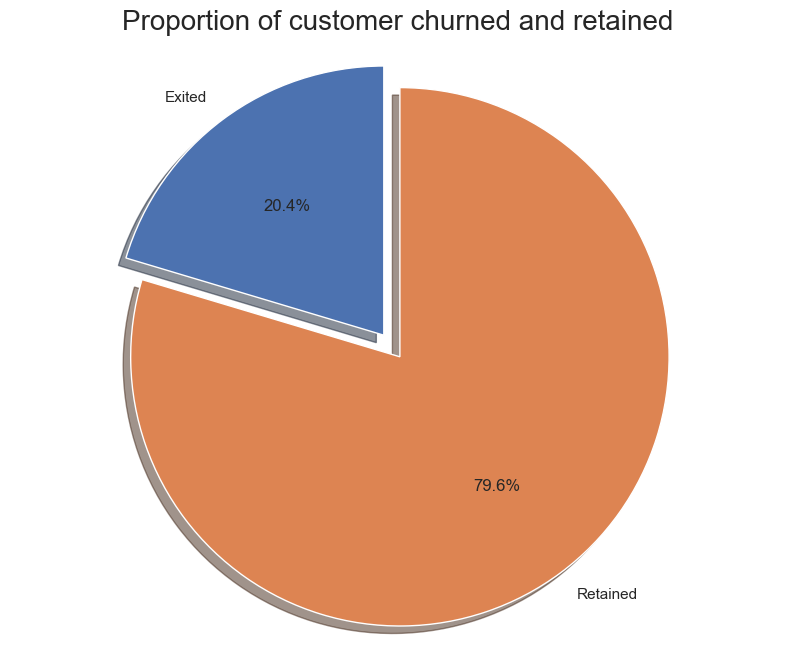

In [31]:
labels = 'Exited', 'Retained'
sizes = [data.Exited[data['Exited']==1].count(), data.Exited[data['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

- About 20% of the customers have churned. So the baseline model could be to predict that 20% of the customers will churn. Given 20% is a small number, we need to ensure that the chosen model does predict with great accuracy this 20% as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained

#### Target variable Vs Categorical variables

In [32]:
ds = pd.read_csv('Churn.csv')

In [33]:
#RowNumber , CustomerId and Surname are unique hence dropping it
ds = ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

<Axes: xlabel='IsActiveMember', ylabel='count'>

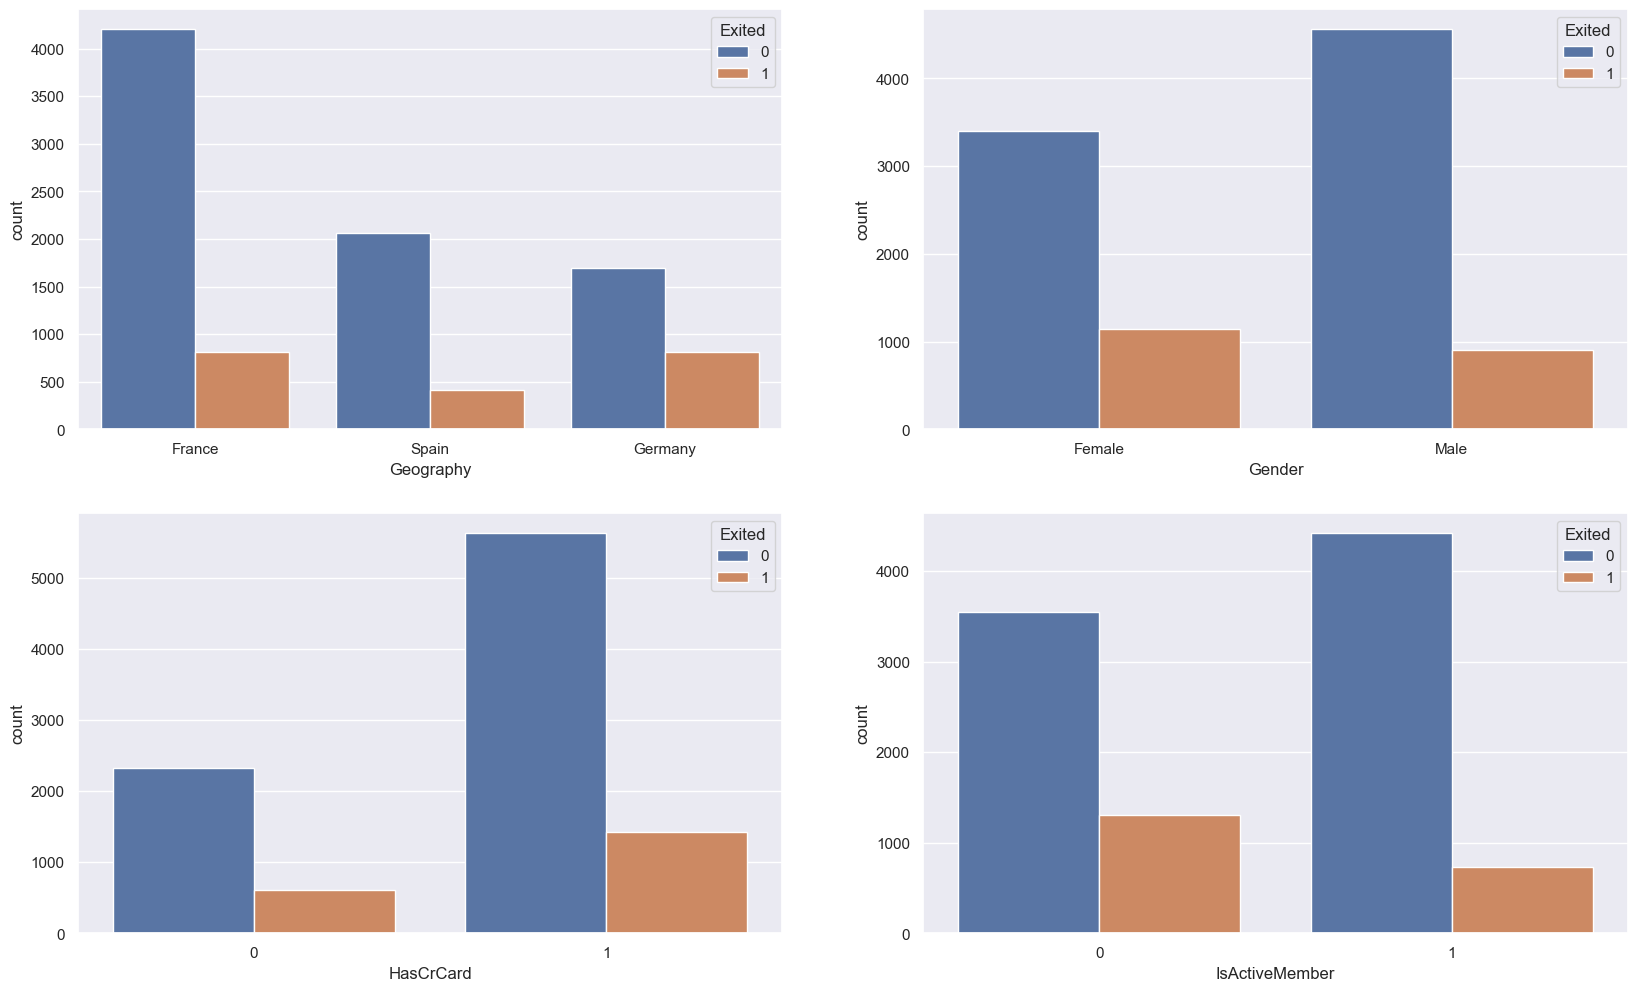

In [34]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = ds, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = ds, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = ds, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = ds, ax=axarr[1][1])

#### We note the following:

- Majority of the data is from persons from France. However, the proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients.

- The proportion of female customers churning is also greater than that of male customers

- Interestingly, majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence.

- Unsurprisingly the inactive members have a greater churn.

- Worryingly is that the overall proportion of inactive mebers is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn

### Target variable Vs Numerical variables

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

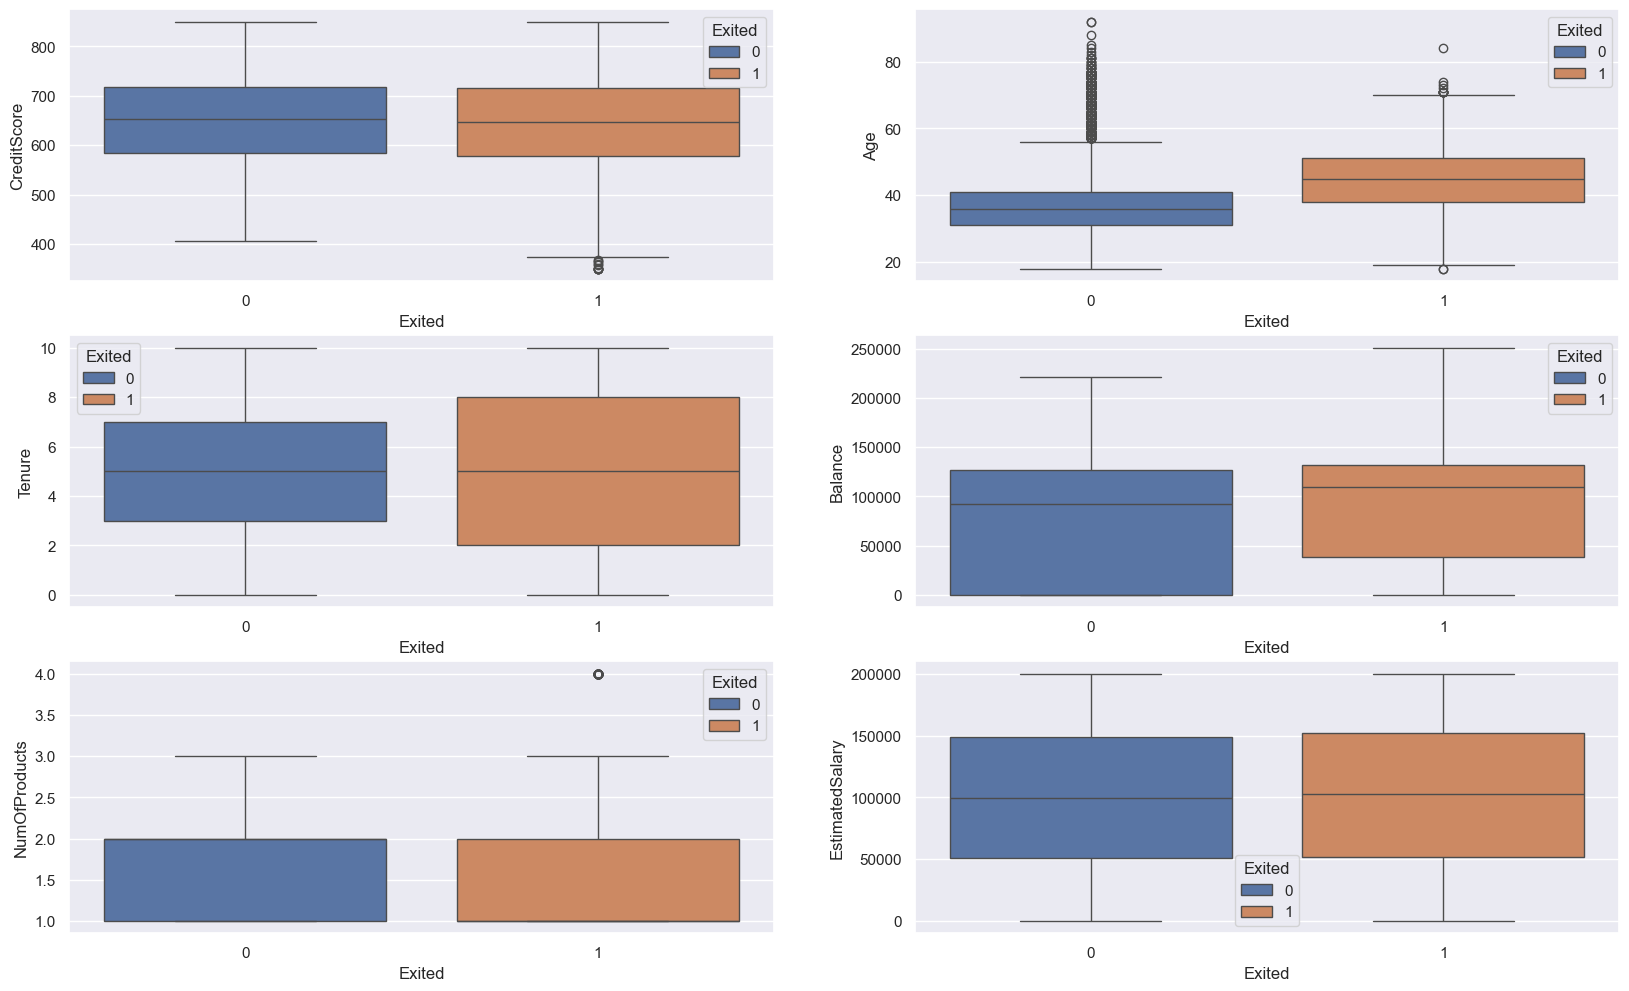

In [35]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = ds, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = ds , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = ds, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = ds, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = ds, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = ds, ax=axarr[2][1])

### We note the following:

- There is no significant difference in the credit score distribution between retained and churned customers. The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review its target market or review the strategy for retention between the different age groups.
- Worryingly, the bank is losing customers with significant bank balances which are likely to hit their available capital for lending.

- Neither the product nor the salary has a significant effect on the likelihood to churn.

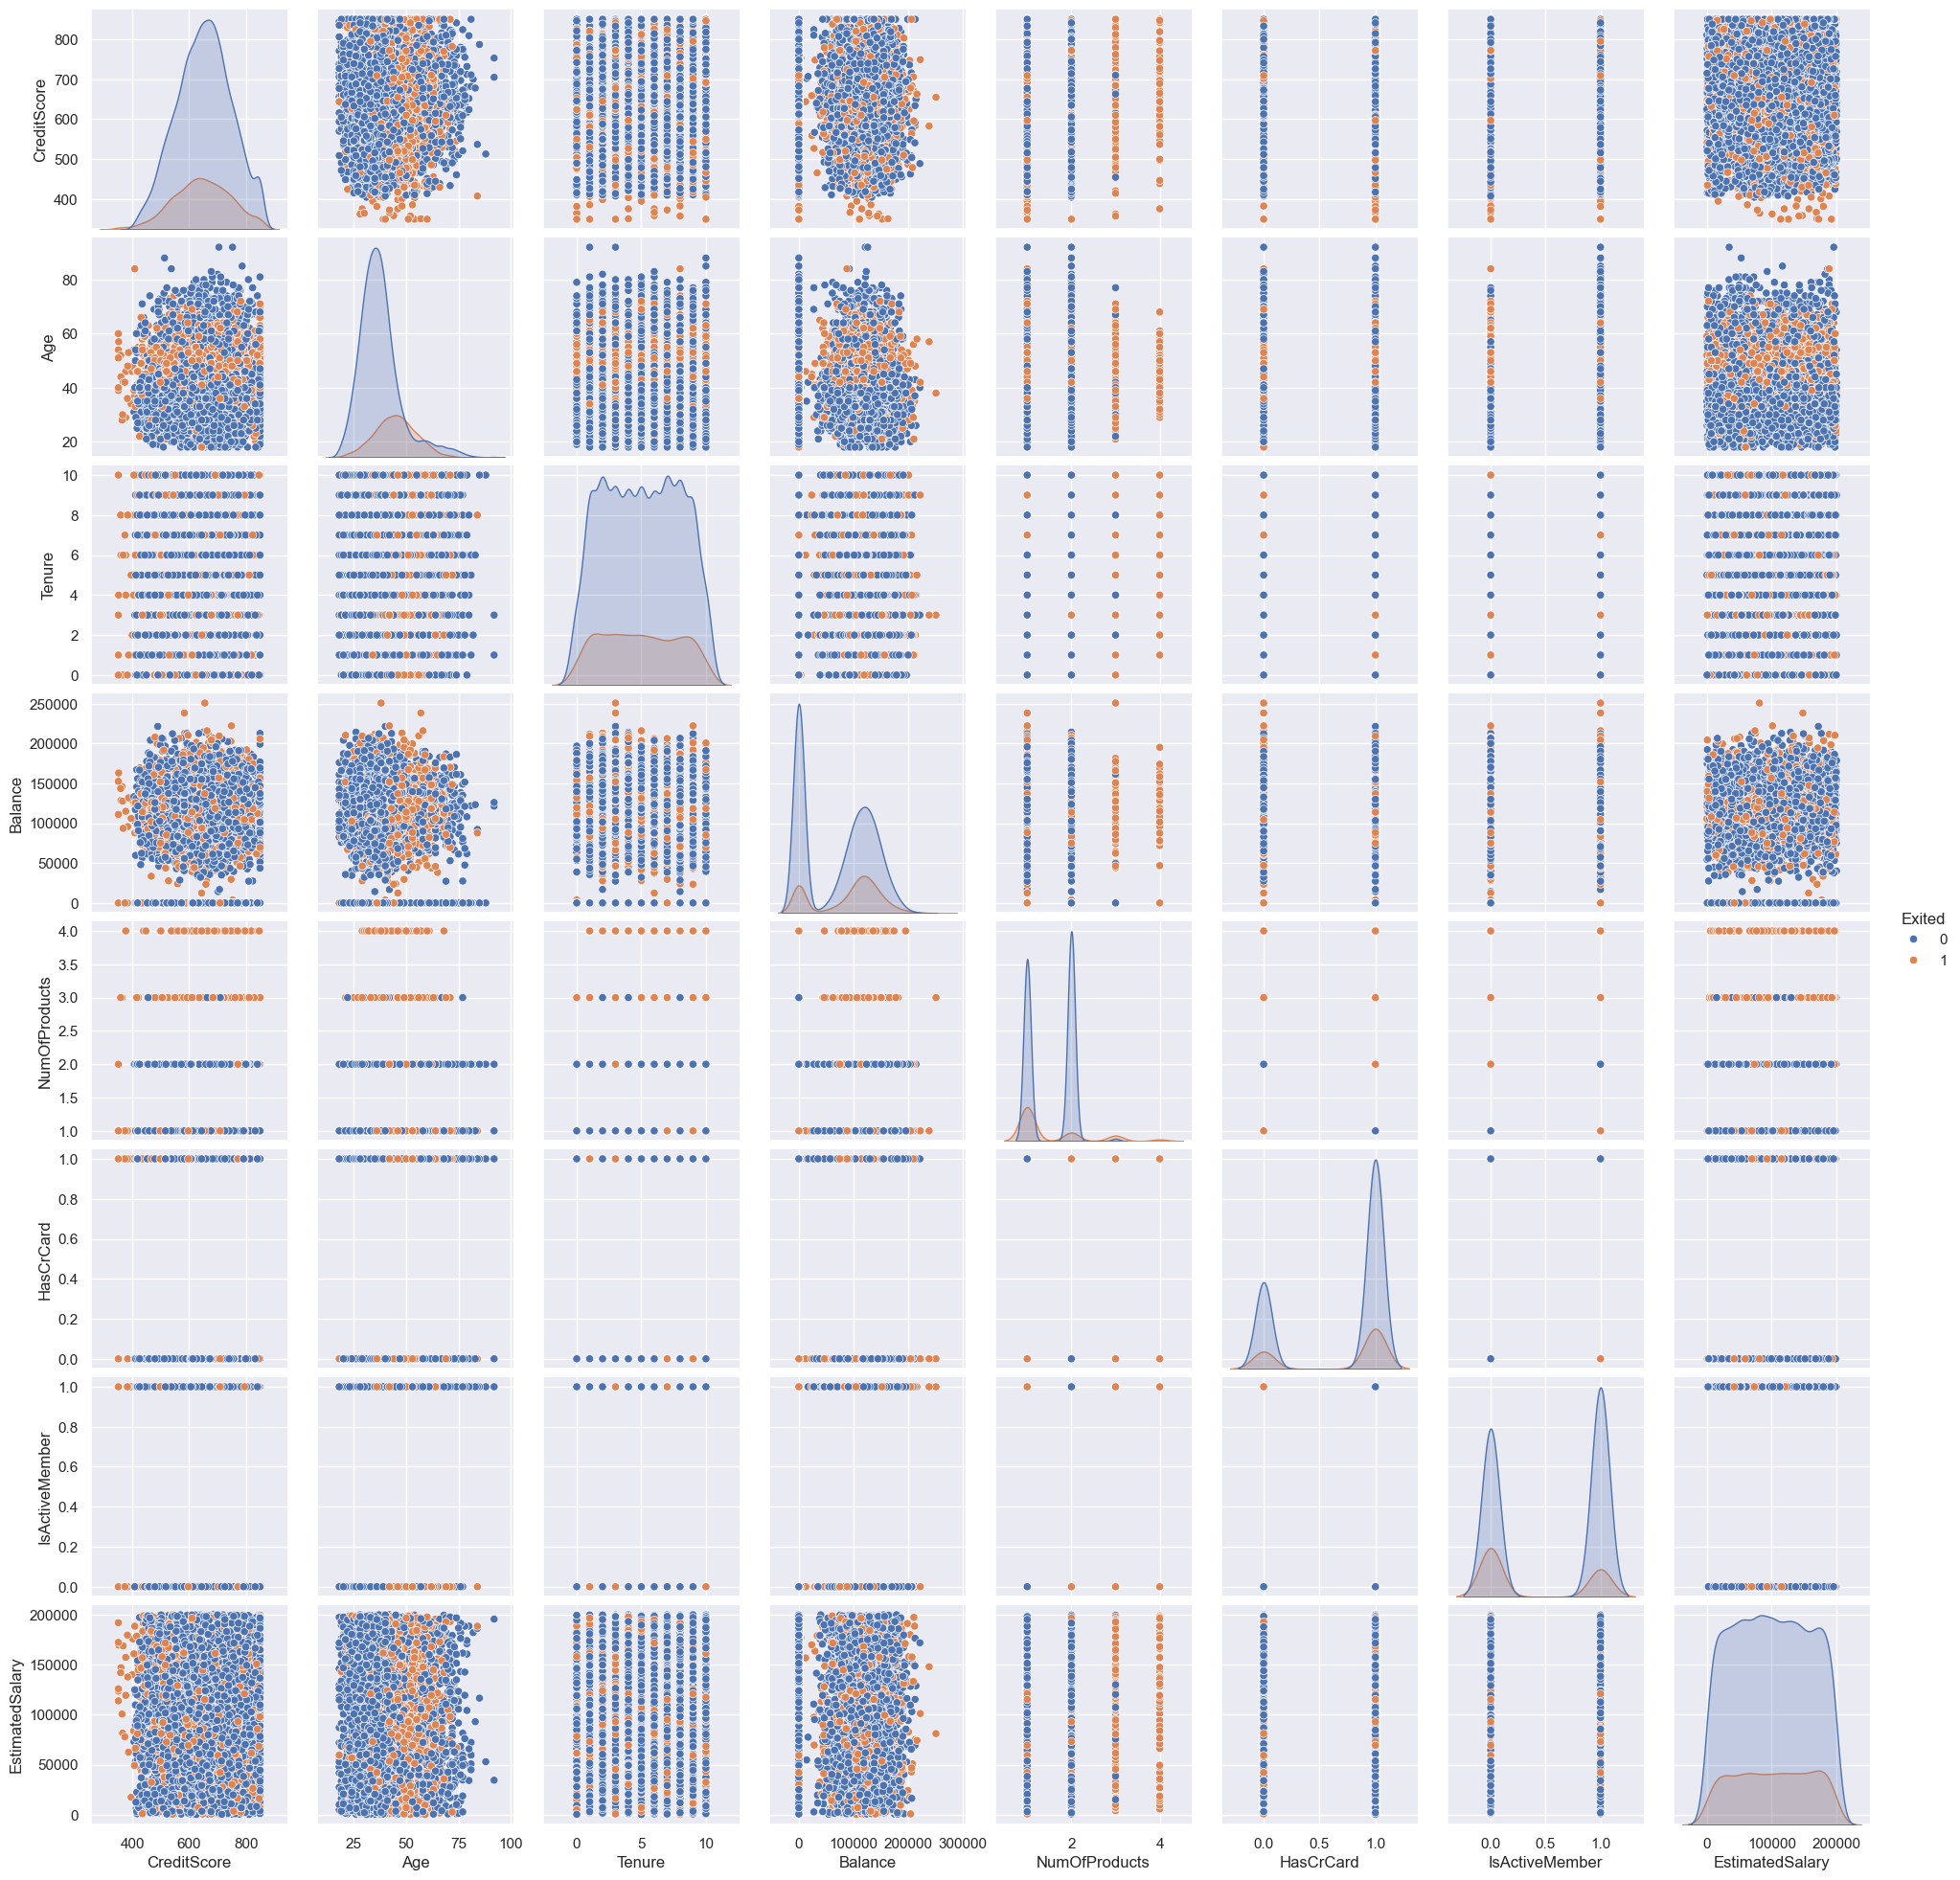

In [36]:
sns.pairplot(ds, diag_kind = 'kde', hue = 'Exited')

In [37]:
# dropping the original columns
data.drop("Age", axis=1, inplace=True)
data.drop("Balance_log", axis=1, inplace=True)
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_log
0,1,15634602,Hargrave,619,France,Female,2,0.000,1,1,1,101348.880,1,3.761
1,2,15647311,Hill,608,Spain,Female,1,83807.860,1,0,1,112542.580,0,3.738
2,3,15619304,Onio,502,France,Female,8,159660.800,3,1,0,113931.570,1,3.761
3,4,15701354,Boni,699,France,Female,1,0.000,2,0,0,93826.630,0,3.689
4,5,15737888,Mitchell,850,Spain,Female,2,125510.820,1,1,1,79084.100,0,3.784


#### Encoding Categorical variables

In [38]:
oneHotCols = ["Geography", "Gender","Tenure","NumOfProducts"]

data = pd.get_dummies(data, columns=oneHotCols, drop_first=True)
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_log,Geography_Germany,Geography_Spain,Gender_Male,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,1,15634602,Hargrave,619,0.000,1,1,101348.880,1,3.761,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,2,15647311,Hill,608,83807.860,0,1,112542.580,0,3.738,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,3,15619304,Onio,502,159660.800,1,0,113931.570,1,3.761,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
3,4,15701354,Boni,699,0.000,0,0,93826.630,0,3.689,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
4,5,15737888,Mitchell,850,125510.820,1,1,79084.100,0,3.784,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False
5,6,15574012,Chu,645,113755.780,1,0,149756.710,1,3.807,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False
6,7,15592531,Bartlett,822,0.000,1,1,10062.800,0,3.932,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False
7,8,15656148,Obinna,376,115046.740,1,0,119346.880,1,3.401,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
8,9,15792365,He,501,142051.070,0,1,74940.500,0,3.807,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False
9,10,15592389,H?,684,134603.880,1,1,71725.730,0,3.332,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RowNumber          10000 non-null  int64  
 1   CustomerId         10000 non-null  int64  
 2   Surname            10000 non-null  object 
 3   CreditScore        10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Age_log            10000 non-null  float64
 10  Geography_Germany  10000 non-null  bool   
 11  Geography_Spain    10000 non-null  bool   
 12  Gender_Male        10000 non-null  bool   
 13  Tenure_1           10000 non-null  bool   
 14  Tenure_2           10000 non-null  bool   
 15  Tenure_3           10000 non-null  bool   
 16  Tenure_4           1000

**Questions**:

- What is the distribution of the credit score of customers? Are there any noticeable patterns or outliers in the distribution?
   - The distribution of the credit score of customers ranges from 350 to 718. The mean credit score is around 651, indicating a potentially normal distribution. The summary doesn't provide specific details about the shape of the distribution (e.g., skewness or kurtosis) or the presence of outliers. To get a more detailed understanding of the credit score distribution and identify any noticeable patterns or outliers, you may want to visualize the data using a histogram or box plot and explore the data's statistical measures further.
-  How many active members are there with the bank?
    - approximately 50% of customers are active members. However, it doesn't provide the exact count of active members. To determine the precise number of active members with the bank, you would need to refer to the raw dataset or perform a more detailed analysis that includes the specific count of customers categorized as active members.
- How are the different customer attributes correlated to each other?
  - There is no correlation is observed between the different customer attributes. This suggests that, based on the exploratory data analysis, there is no strong linear relationship between the examined customer attributes. However, it's important to note that the absence of correlation does not necessarily imply the absence of relationships or dependencies, especially non-linear ones.
- Who is churning more when compared to males and females?
   - the proportion of female customers churning is greater than that of male customers. Therefore, based on the analysis conducted, females are churning more compared to males in the dataset. The exact proportions or percentages of churned customers among males and females are not provided 
- Customers from which geographical part are churning more?
   -  the majority of the data is from France and implies that the proportion of churned customers is inversely related to the population of customers

#### To see distribution of target across the variables

### Distinguish the feature and target set

In [40]:
X = ds.drop(['Exited'],axis=1) # Credit Score through Estimated Salary
y = ds[['Exited']] # Exited

In [41]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.000,1,1,1,101348.880
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580
2,502,France,Female,42,8,159660.800,3,1,0,113931.570
3,699,France,Female,39,1,0.000,2,0,0,93826.630
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100


In [42]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=5)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.10,random_state=5)
print("X_train size is {}".format(X_train.shape[0]))
print("X_val size is {}".format(X_val.shape[0]))
print("X_test size is {}".format(X_test.shape[0]))

X_train size is 8100
X_val size is 900
X_test size is 1000


In [44]:
## Standardising the train, Val and Test data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
num_cols=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
num_subset=scaler.fit_transform(X_train[num_cols])
X_train_num_df=pd.DataFrame(num_subset,columns=num_cols)
X_train_num_df['Geography']=list(X_train['Geography'])
X_train_num_df['Gender']=list(X_train['Gender'])
X_train_num_df['HasCrCard']=list(X_train['HasCrCard'])
X_train_num_df['IsActiveMember']=list(X_train['IsActiveMember'])
X_train_num_df.head()
## Standardise the Validation data
num_subset=scaler.fit_transform(X_val[num_cols])
X_val_num_df=pd.DataFrame(num_subset,columns=num_cols)
X_val_num_df['Geography']=list(X_val['Geography'])
X_val_num_df['Gender']=list(X_val['Gender'])
X_val_num_df['HasCrCard']=list(X_val['HasCrCard'])
X_val_num_df['IsActiveMember']=list(X_val['IsActiveMember'])
## Standardise the Test data
num_subset=scaler.fit_transform(X_test[num_cols])
X_test_num_df=pd.DataFrame(num_subset,columns=num_cols)
X_test_num_df['Geography']=list(X_test['Geography'])
X_test_num_df['Gender']=list(X_test['Gender'])
X_test_num_df['HasCrCard']=list(X_test['HasCrCard'])
X_test_num_df['IsActiveMember']=list(X_test['IsActiveMember'])

In [45]:
## Convert the categorical features to numerical
X_train_num_df=pd.get_dummies(X_train_num_df,columns=['Geography','Gender'])
X_test_num_df=pd.get_dummies(X_test_num_df,columns=['Geography','Gender'])
X_val_num_df=pd.get_dummies(X_val_num_df,columns=['Geography','Gender'])
X_train_num_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-1.179,-1.042,-1.732,0.199,0.821,1.560,1,1,True,False,False,False,True
1,-0.380,-1.327,1.731,-0.022,-0.908,-0.714,1,0,False,False,True,True,False
2,-0.349,1.808,-0.693,0.681,0.821,-1.127,1,0,False,True,False,True,False
3,0.626,2.378,-0.347,-1.229,0.821,-1.683,1,1,True,False,False,False,True
4,-0.204,-1.137,1.731,0.924,-0.908,1.333,1,1,False,False,True,False,True


## Model evaluation criterion

##### Model can make wrong predictions as:
Predicting a customer is exiting and the customer is not exiting
Predicting a customer is not exiting and customer is exiting
#### Which case is more important?
Predicting that customer is not exiting but he/she is exiting. It might cause loss to the banks because due to wrong identification bank will not be able to take any initiative for those sensitive customers.
#### How to reduce this loss i.e need to reduce False Negative?
Bank would want Recall to be maximized, greater the Recall higher the chances of minimizing false Negative. Hence, the focus should be on increasing Recall or minimizing the false Negative or in other words identifying the True Positive(i.e. Class 1) so that the bank can retain their customers.

## Initialise and build the Model

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Assuming X and y are your original data
# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=5)

# Standardize the data
scaler = StandardScaler()
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Standardize the training data
X_train_num_subset = scaler.fit_transform(X_train[num_cols])
X_train_num_df = pd.DataFrame(X_train_num_subset, columns=num_cols)
X_train_num_df[['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']] = X_train[['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']]

# Convert categorical features to numerical
X_train_num_df = pd.get_dummies(X_train_num_df, columns=['Geography', 'Gender'])

# Convert to NumPy arrays
X_train_array = X_train_num_df.values.astype(np.float32)
y_train_array = y_train.values.astype(np.float32)  # Assuming y_train is a DataFrame

# Build the model
model = Sequential()
model.add(Dense(7, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = tf.keras.optimizers.Adam(0.01)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Fit the model
model.fit(X_train_array, y_train_array, epochs=100, batch_size=10, verbose=1)



Epoch 1/100


810/810 [==============================] - 4s 3ms/step - loss: 0.5124 - accuracy: 0.7964
Epoch 2/100
810/810 [==============================] - 2s 3ms/step - loss: 0.5065 - accuracy: 0.7967
Epoch 3/100
810/810 [==============================] - 2s 3ms/step - loss: 0.5069 - accuracy: 0.7967
Epoch 4/100
810/810 [==============================] - 2s 3ms/step - loss: 0.5066 - accuracy: 0.7967
Epoch 5/100
810/810 [==============================] - 2s 3ms/step - loss: 0.5059 - accuracy: 0.7967
Epoch 6/100
810/810 [==============================] - 2s 3ms/step - loss: 0.5062 - accuracy: 0.7967
Epoch 7/100
810/810 [==============================] - 2s 3ms/step - loss: 0.5069 - accuracy: 0.7967
Epoch 8/100
810/810 [==============================] - 2s 3ms/step - loss: 0.5065 - accuracy: 0.7967
Epoch 9/100
810/810 [==============================] - 3s 3ms/step - loss: 0.5059 - accuracy: 0.7967
Epoch 10/100
810/810 [==============================] - 3s 3ms/step - loss: 0.5061 - acc

### Model Evaluation Criterion

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)






#### No missing values

#### Split the dataset into independent features (ie: X) and label (ie: y)


#### Split the dataset further into train and test sets.



#### Apply feature scaling to train and test sets of independent features.

In [47]:
df=pd.read_csv('Churn.csv')

In [48]:
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

#### Converting 'Geography' and 'Gender' column

In [49]:
# Converting 'Geography' and 'Gender' column
geography = pd.get_dummies(df['Geography'], drop_first=True)
gender = pd.get_dummies(df['Gender'], drop_first=True)

#### Appending columns to original dataframe

In [50]:
# Appending columns to original dataframe
df = pd.concat([df, geography, gender], axis=1)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Germany', 'Spain', 'Male'],
      dtype='object')

In [51]:
df.drop(['Geography', 'Gender'], axis=1, inplace=True)

In [52]:
X = df.drop('Exited', axis=1)
y = df['Exited']

#### Splitting the dataset into train and test sets.

In [53]:
# Splitting the dataset into train and test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (8000, 11), X_test size: (2000, 11)


#### Feature Scaling

In [54]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Building Artificial Neural Network (ANN)

#### Comprising input and output layers, along with a hidden layer (typically), neural networks feature interconnected units that transform input information into a format usable by the output layer. ANNs are characterized by three interconnected layers: the initial layer, comprising input neurons; the second layer, transmitting data to the third layer; and the third layer, hosting output neurons. These networks function as non-linear statistical data modeling tools, effectively capturing intricate relationships between inputs and outputs or identifying underlying patterns.

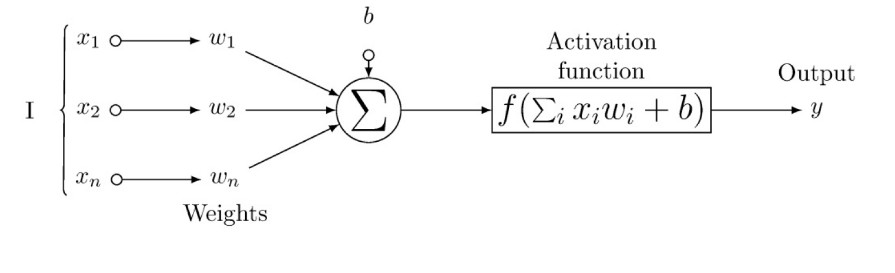

### How does ANN work?

ANNs operate based on what is known as the Hidden State, akin to the neurons in our brain. Each hidden state serves as a transient entity exhibiting probabilistic behavior. A matrix of these hidden states functions as a connection between the input and output. The input layer represents the data supplied to the ANN, while the hidden layers, where the transformative processes occur, can be considered the heart of the operation. #### Finally, the output layer is where the completed computations of the network are stored, ready for our utilization

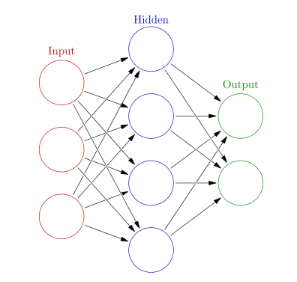

- Assign Random weights to all the linkages to start the algorithm- 
Using the inputs and the ( input-> hidden nodes) linkages find the activation rate of hidden Nodes nodes

- Using the activation rate of hidden nodes and linkages to output, find the activation rate of output Nodes
- Find the error rates at the output node and recalibrate all the linkages between hidden Nodes and output Nodes


- Using the weights and error found at output node, cascade down the error to hidden Nodes
- Repeat the Process till the convergence criterion is met
- Using the final linkage weights score the activation rate of the output nodes

In [55]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [56]:
# Initialising the ANN
classifier = Sequential()

In [57]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=11))

In [58]:
# Adding the second hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))

In [59]:
# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

### Compiling the ANN

In [60]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [61]:
# Fitting the ANN to the Training set
model_history = classifier.fit(X_train, y_train, batch_size=10, validation_split=0.33, epochs=100)

Epoch 1/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5473 - accuracy: 0.7824 - val_loss: 0.4901 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4666 - accuracy: 0.7962 - val_loss: 0.4546 - val_accuracy: 0.7959
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4429 - accuracy: 0.7998 - val_loss: 0.4427 - val_accuracy: 0.8001
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4323 - accuracy: 0.8082 - val_loss: 0.4379 - val_accuracy: 0.8054
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4260 - accuracy: 0.8155 - val_loss: 0.4336 - val_accuracy: 0.8095
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4213 - accuracy: 0.8158 - val_loss: 0.4305 - val_accuracy: 0.8080
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4177 - accuracy: 0.8210 - val_loss: 0.4283 - val_accuracy: 0.8088

In [62]:
# List all data in history
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Summarize history for accuracy

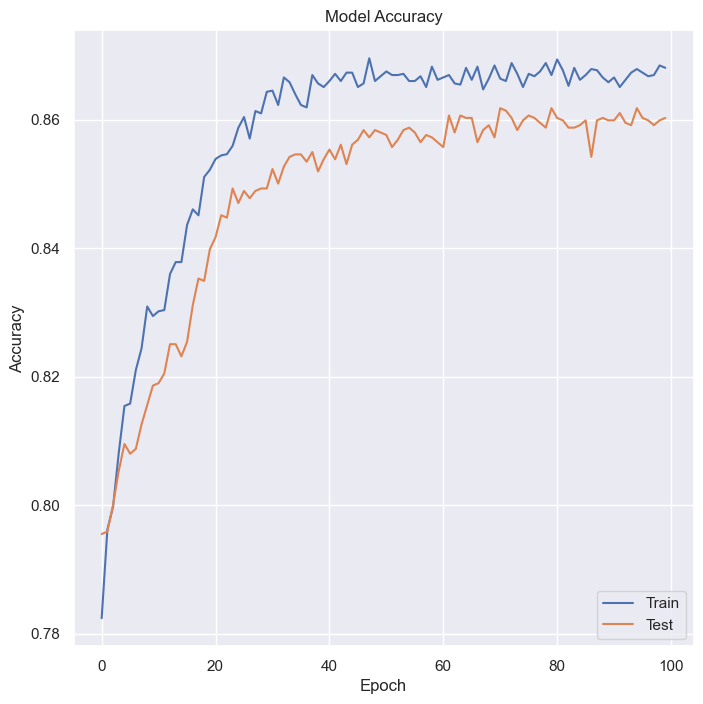

In [63]:
# Summarize history for accuracy
plt.figure(figsize=(8,8))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

### Summarize history for loss

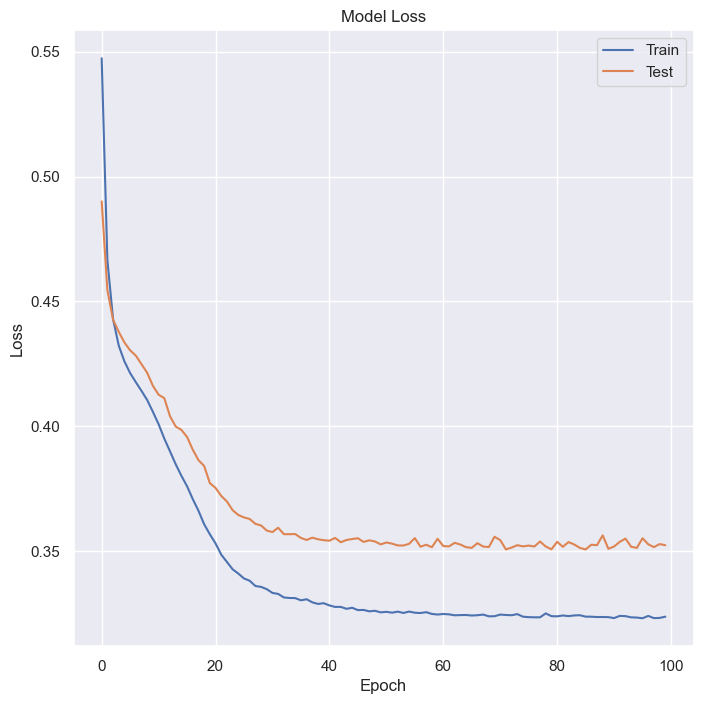

In [64]:
# Summarize history for loss
plt.figure(figsize=(8,8))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

## Model Evaluation

In [65]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [66]:
y_pred

array([[0.2730518 ],
       [0.22155637],
       [0.05873086],
       ...,
       [0.2703145 ],
       [0.15551537],
       [0.24630119]], dtype=float32)

In [67]:
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

##  Confusion Matrix

In [68]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1511,   84],
       [ 198,  207]], dtype=int64)

• Total correct predictions that customers stay in bank = 1502

• Total correct predictions that customers leave the bank = 218

• Total incorrect predictions that customers stay in the bank = 187

• Total incorrect predictions that customers leave in the bank = 93

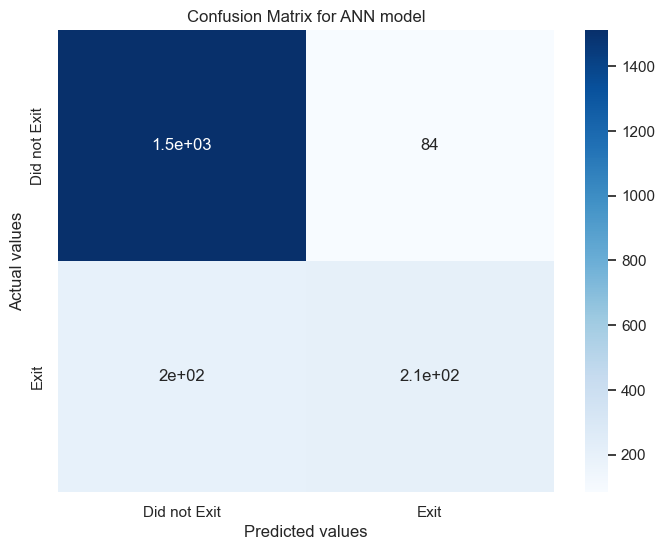

In [69]:
# Plotting confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['Did not Exit', 'Exit'], yticklabels=['Did not Exit', 'Exit'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for ANN model')
plt.show()

## Accuracy

In [70]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
print('The accuracy for ANN model is: {}%'.format(score*100))

The accuracy for ANN model is: 85.9%


### Results - 86% Accuracy achieved.

## Predictions

In [71]:
def predict_exit(sample_value):
  
  # Convert list to numpy array
  sample_value = np.array(sample_value)

  # Reshape because sample_value contains only 1 record
  sample_value = sample_value.reshape(1, -1)

  # Feature Scaling
  sample_value = sc.transform(sample_value)

  return classifier.predict(sample_value)

In [72]:
# Predictions
# Value order 'CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Germany','Spain','Male'.
sample_value = [738, 62, 10, 83008.31, 1, 1, 1, 42766.03, 1, 0, 1]
if predict_exit(sample_value)>0.5:
  print('Prediction: High change of exit!')
else:
  print('Prediction: Low change of exit.')

1/1 [==============================] - 0s 24ms/step
Prediction: Low change of exit.


In [73]:
# Predictions
# Value order 'CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Germany','Spain','Male'.
sample_value = [805, 45, 9, 116585.97, 1, 1, 0, 189428.75, 1, 0, 0]
if predict_exit(sample_value)>0.5:
  print('Prediction: High change of exit!')
else:
  print('Prediction: Low change of exit.')

1/1 [==============================] - 0s 16ms/step
Prediction: High change of exit!


## Actionable Insights and Recommendations 

**What recommedations would you suggest to the bank?**

### Based on the analysis of the customer data and the performance of the predictive model, here are specific recommendations for the bank to address the issue of customer churn:

#### Enhance Digital Offerings:

- Invest in improving digital platforms, web portals, and mobile apps.
Create a seamless and engaging online experience to increase customer interaction.

#### Regional Strategies:

- Conduct a thorough review of service delivery operations in Germany to identify and address gaps.
Tailor services to meet the specific needs and preferences of customers in different countries.

#### Product Engagement and Diversification:

Encourage customers to use a wider range of financial products offered by the bank.
Introduce age-relevant products to appeal to younger customers and meet their specific financial needs.

#### Credit Score Management:

Implement strategies to retain customers with high credit scores, such as offering competitive deals and personalized services.
Investigate reasons behind the higher churn among high credit score customers and address any issues.

#### Credit Card Promotion:

Actively market credit cards, highlighting their benefits and features.
Consider adding additional incentives like cash backs and reward points to make credit cards more appealing.

#### Digital Platform Adoption:

Encourage inactive customers to adopt digital banking channels.
Offer incentives or promotions for using digital platforms to enhance customer engagement.

#### Financial Product Customization:

Introduce attractive financial products tailored for lower to middle-class earners.
Consider incentives, lower interest rates, and reduced penalties to attract and retain this customer segment.

#### Customer Engagement Surveys:

Conduct frequent surveys to gather feedback from customers across all channels.
Use the feedback to identify areas for improvement and address customer concerns promptly.

#### Age-Related Strategies:

Create targeted marketing campaigns for different age groups, addressing their unique preferences and needs.
Introduce age-specific products and services to appeal to a diverse customer base.

#### Continuous Monitoring and Adaptation:

Regularly monitor customer trends and behaviors.
Stay agile and adapt strategies based on changing market conditions and customer expectations.

#### Employee Training:

Train bank employees to provide excellent customer service.
Empower customer-facing staff to address customer concerns effectively.

#### Retention Programs:

Implement customer retention programs to reward loyal customers.
Provide exclusive offers or discounts to long-term customers to reinforce loyalty.

##### By implementing these recommendations, the bank can create a more customer-centric approach, reduce churn, and enhance overall customer satisfaction. Regular evaluation and adjustment of strategies based on customer feedback and market dynamics will be crucial for sustained success.

___